In [1]:
# Testing configuration of upper interface of SAMs with different OH- headgroups percentages
# (polarities). The surface is configured as a grid of atoms (C and O)
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os
import pdbfile_v2 as pdb

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
########################### SET PARAMETERS FOR THE SIZE ###############################
xcopies = 1
ycopies = 1

Nx = 3 # number of gridpoints in x-direction (carbons)
Ny = 3 # number of gridpoints in y-direction (carbons)

Nx = Nx*xcopies # number of gridpoints in x-direction (carbons)
Ny = Ny*ycopies # number of gridpoints in y-direction (carbons)

a0 = 5.0 # set lattice vector length

In [4]:
# Approximate position of head groups on top of the surface so that the bottom ones are approx. at z=0
CCbondangle = 109.5
CCbondlength = 1.54
N_carbons = 11
zlast = N_carbons*CCbondlength*sin(radians(CCbondangle/2))*cos(np.pi/6) #vertical length of the chain without upper head group
zlast = zlast + 2.0 # add approx. the bond lengths of C-O and H-O (upper head group)
print zlast

13.9805157135


In [5]:
################################## FUNCTION TO PLOT HEAT MAP  ######################################
def plotheat(pType, pc, Nx, Ny, loop):
    # HEATMAP
    #   create array with 0s where there is O
    #   and ones where there is C:
    Z = np.zeros([Nx,Ny],dtype=int)
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'C':
                Z[i,j] = 1
    
    # plot the heatmap
    fig, ax = plt.subplots()
    ax.imshow(Z, cmap=plt.cm.winter, interpolation='nearest')
              
    myfile = 'pc' + str(int(pc*100)) + '_heat_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_heat_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    fig.savefig(myfile ,format='pdf')

In [6]:
################################## FUNCTION TO PLOT GRID  ######################################
def plotgrid(pType, a0, pc, Nx, Ny, text, loop):
    
    xPos, yPos = pdb.creategrid(a0, Nx, Ny)
    
    SizeOfDots = 8
    fig, ax = plt.subplots()
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'O':
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
            else:
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='yellow')
                
    plt.title("Pc = " + str(int(pc*100)) + text, fontsize= 14)
    plt.grid()
    plt.show()
    myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'.pdf'
    n = 1
    while os.path.isfile(myfile): # If file exists, change file name
        myfile = 'pc' + str(int(pc*100)) + '_grid_'+ str(loop) +'_'+ str(n) + '.pdf'
        n = n + 1
    fig.savefig(myfile ,format='pdf')

In [7]:

########################### EXCHANGE CARBONS WITH OXYGENS #############################

In [8]:
path = "/Users/eixeres/Desktop/Plots_small_grids/"
os.chdir(path)

[['C' 'C' 'C']
 ['C' 'C' 'C']
 ['C' 'C' 'C']]


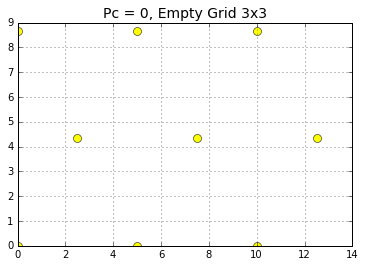

In [14]:
"""
########################### Print empty grid #############################################

loop = 'Empty_'+ str(Nx) + 'x' +str(Ny)
pType = pdb.C_restart(Nx,Ny)
pc = 0
mytext = ', Empty Grid ' + str(Nx) + 'x' +str(Ny)
print pType.T
plotgrid(pType.T, a0, pc, Nx, Ny, mytext, loop)
"""

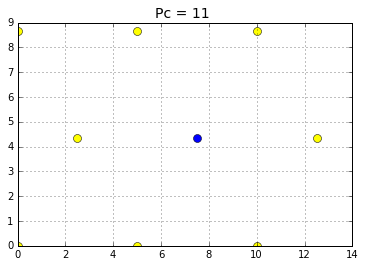

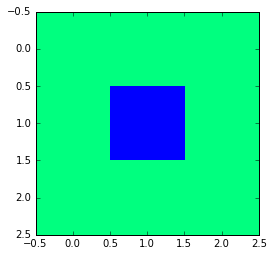

In [15]:
pType = pdb.C_restart(Nx,Ny)
loop = 'Manual_small'
mytext = ' '
pType[1,1] = 'O'
n_oxys = 1
pc = float(n_oxys)/float(Nx*Ny)
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

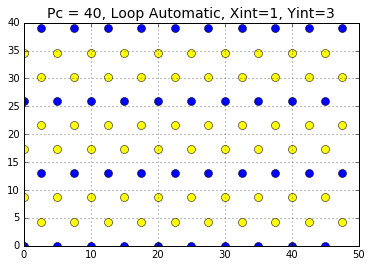

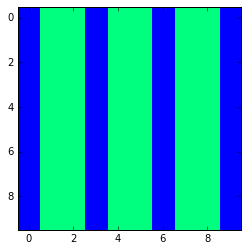

In [17]:
######################## Automactic Distance ###############################
loop = 'Autom'

Nxoxy = 6 # number of oxygens in x-direction 
Nyoxy = 3 # number of oxygens in y-direction 

# exchange particles (oxygens for carbons)
#    Get indices of particles to replace:
xincrement = Nx/Nxoxy
yincrement = Ny/Nyoxy

n_oxys =0
pType = pdb.C_restart(Nx,Ny)
for k in range(0,Nx,xincrement):
    for l in range(0,Ny,yincrement):
        if pType[k,l]=='C':
                pType[k,l] = 'O' 
                n_oxys = n_oxys + 1
pc = float(n_oxys)/float(Nx*Ny)
mytext = ', Loop Automatic, Xint='+ str(xincrement)+', Yint='+str(yincrement)
plotgrid(pType, a0, pc, Nx, Ny, mytext, loop)
plotheat(pType, pc, Nx, Ny, loop)

In [26]:
"""
xPos, yPos = pdb.creategrid(a0, Nx, Ny)
pdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)
"""

'\nxPos, yPos = pdb.creategrid(a0, Nx, Ny)\npdb.writepdb(pType,xPos,yPos,zlast,pc,a0,Nx,Ny)\n'

In [35]:
################ NOW WE CREATE THE CHOSEN SURFACES (CHOSEN BY LOOKING AT OUTPUT PICTURES)   ################